# **By: Basant Ahmed Ragab Mohamed**


## About the Dataset



The Mall Customers dataset from Kaggle contains demographic and behavioral information about customers in a shopping mall.

Each record includes:

1. CustomerID – unique identifier

2. Genre – gender of the customer

3. Age – age in years

4. Annual Income (k$) – annual income in thousands of dollars

5. Spending Score (1–100) – a score assigned by the mall based on customer spending habits and behavior

#### Goal:
To segment customers into distinct groups based on their spending patterns and income levels, helping businesses understand their customer base and tailor marketing strategies effectively.

## Load and explore the dataset

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.cluster import DBSCAN

In [3]:
data = pd.read_csv('sample_data/Mall_Customers.csv')

In [4]:
data.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
data.shape

(200, 5)

In [6]:
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [8]:
data.isnull().sum()

,0
CustomerID,0
Genre,0
Age,0
Annual Income (k$),0
Spending Score (1-100),0


In [9]:
data.dropna()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


> No missing values


In [10]:
data.duplicated().sum()

np.int64(0)

## Exploratory Data Analysis

/tmp/ipython-input-3653582376.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Genre', data=data, palette='Set2')


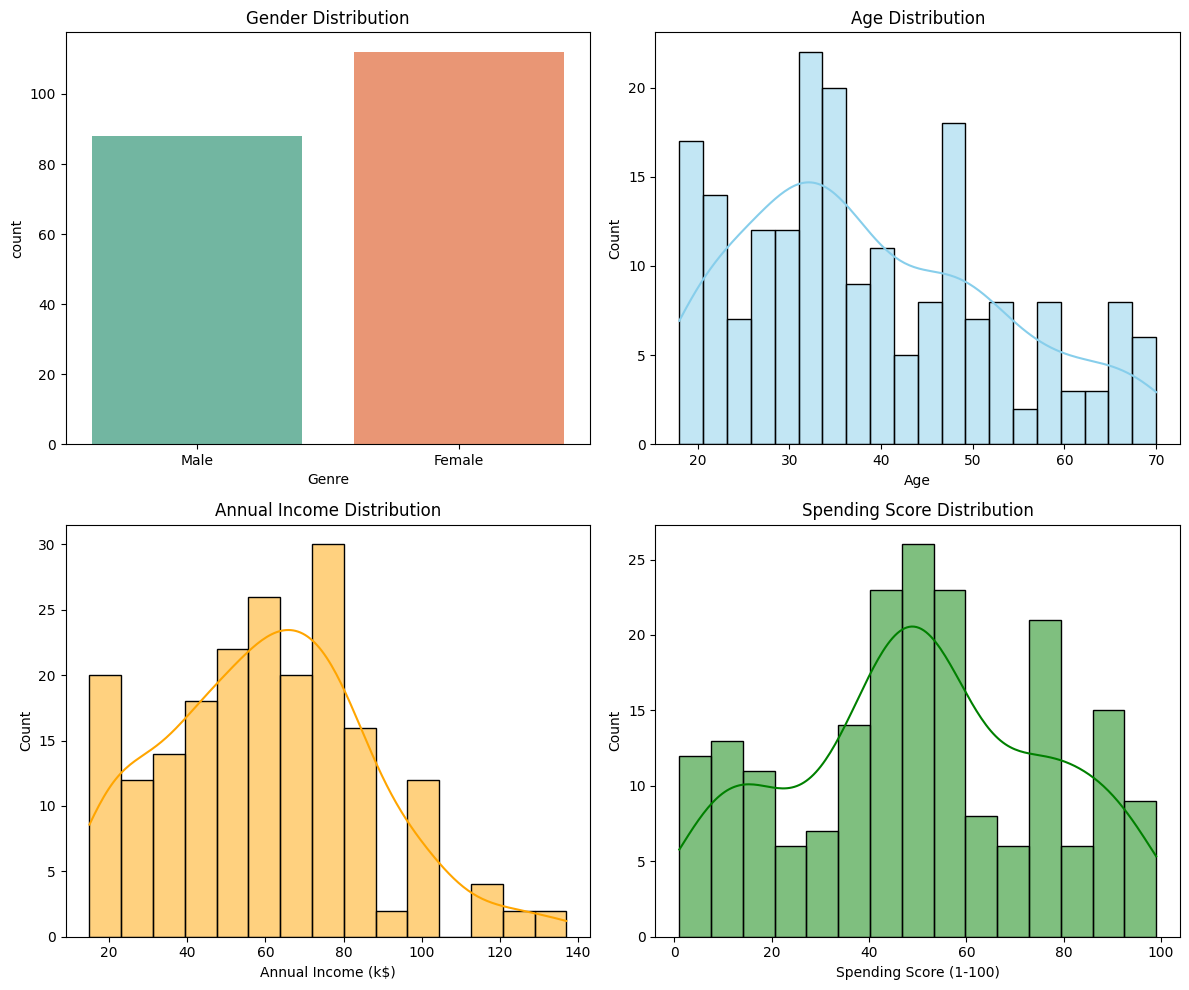

In [11]:
# --- Combined Visualization for EDA ---

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 10))

# 1️⃣ Genre (Gender) Distribution
plt.subplot(2, 2, 1)
sns.countplot(x='Genre', data=data, palette='Set2')
plt.title('Gender Distribution')

# 2️⃣ Age Distribution
plt.subplot(2, 2, 2)
sns.histplot(data['Age'], bins=20, kde=True, color='skyblue')
plt.title('Age Distribution')
plt.xlabel('Age')

# 3️⃣ Annual Income Distribution
plt.subplot(2, 2, 3)
sns.histplot(data['Annual Income (k$)'], bins=15, kde=True, color='orange')
plt.title('Annual Income Distribution')
plt.xlabel('Annual Income (k$)')

# 4️⃣ Spending Score Distribution
plt.subplot(2, 2, 4)
sns.histplot(data['Spending Score (1-100)'], bins=15, kde=True, color='green')
plt.title('Spending Score Distribution')
plt.xlabel('Spending Score (1-100)')

# Adjust layout
plt.tight_layout()
plt.show()


> **Insights:**<br><br>
Gender Distribution: The dataset contains a relatively balanced distribution between male and female customers, ensuring that gender bias is minimal in further analysis. <br><br>
Age Distribution: Most customers fall between 25 and 40 years old, with fewer very young or older customers. This suggests that the mall primarily attracts middle-aged adults.<br><br>
Annual Income: The income distribution is fairly uniform, ranging roughly from $15K to $140K, which provides a diverse customer base for segmentation.<br><br>
Spending Score: Spending scores are well distributed, but clusters appear around both low and high spending levels, indicating clear differences in purchasing behavior.<br><br>

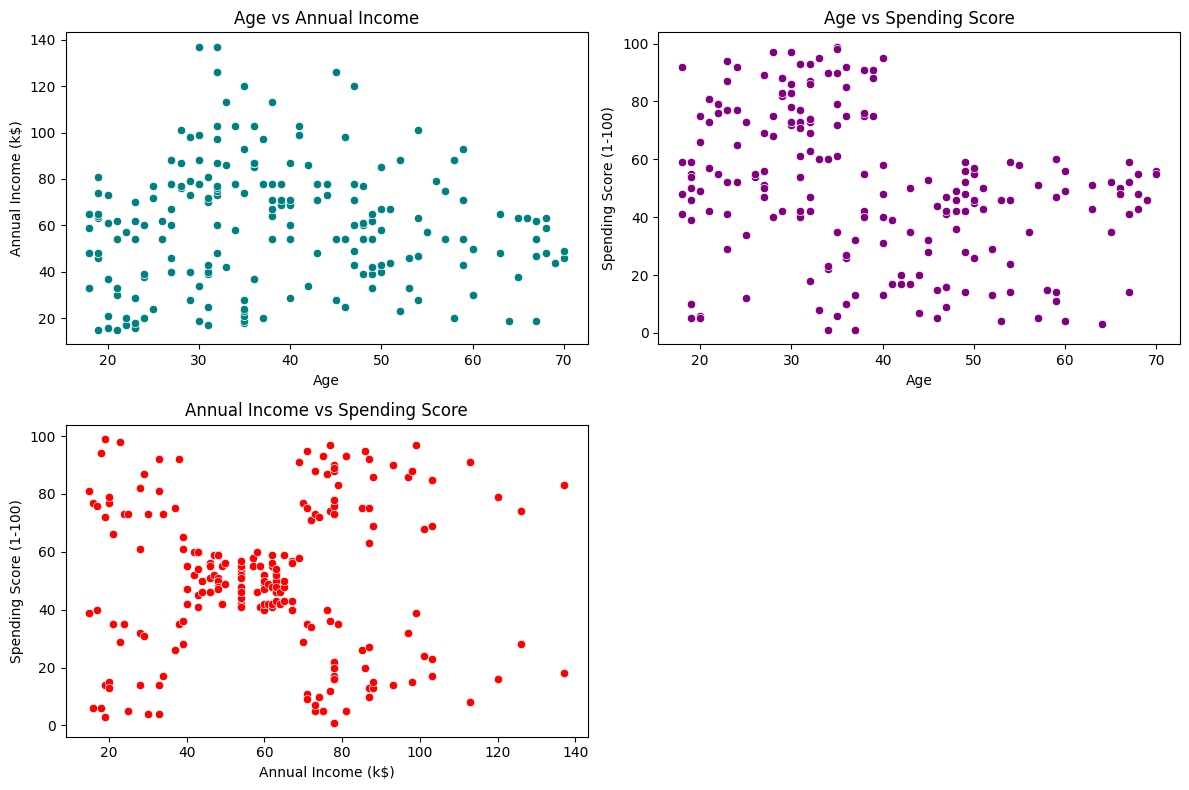

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 8))

# 1️⃣ Age vs Annual Income
plt.subplot(2, 2, 1)
sns.scatterplot(x='Age', y='Annual Income (k$)', data=data, color='teal')
plt.title('Age vs Annual Income')
plt.xlabel('Age')
plt.ylabel('Annual Income (k$)')

# 2️⃣ Age vs Spending Score
plt.subplot(2, 2, 2)
sns.scatterplot(x='Age', y='Spending Score (1-100)', data=data, color='purple')
plt.title('Age vs Spending Score')
plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')

# 3️⃣ Annual Income vs Spending Score
plt.subplot(2, 2, 3)
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', data=data, color='red')
plt.title('Annual Income vs Spending Score')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')

plt.tight_layout()
plt.show()


> **Insights**<br><br>
The Age vs Spending Score plot shows that younger customers tend to have higher spending scores, suggesting they may be more active shoppers.<br><br>
The Annual Income vs Spending Score plot shows visible groups — customers with similar income levels but different spending behaviors — hinting at natural clusters suitable for K-Means segmentation.



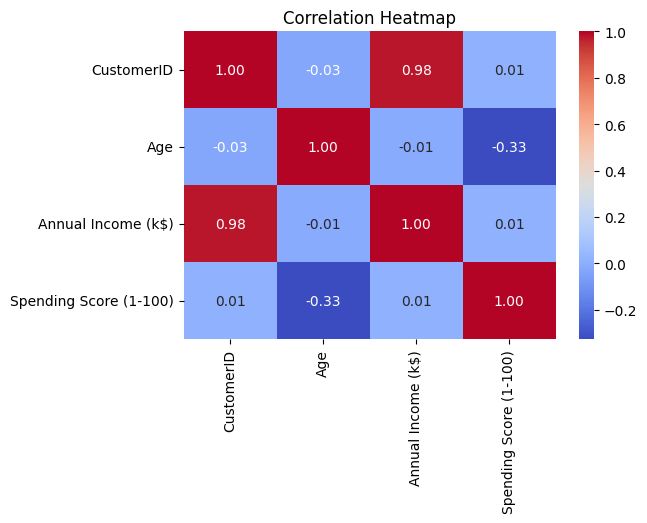

In [13]:
# --- Correlation Heatmap (separate figure) ---
numeric_data = data.select_dtypes(include=['int64', 'float64'])

plt.figure(figsize=(6, 4))
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()



> The correlation heatmap confirms that there is little direct correlation between income and spending score (correlation close to 0), meaning spending behavior cannot be predicted by income alone — making clustering a good approach to find patterns.

*Based on the insights from the exploratory analysis, it is evident that customers show distinct variations in their spending behavior and income levels. These differences suggest the presence of natural groupings within the data. Therefore, to identify these customer segments more effectively, K-Means clustering is applied using Annual Income and Spending Score as the main features. This unsupervised learning approach helps classify customers into meaningful groups, enabling better understanding of their purchasing patterns and potential business strategies.*

## Feature Selection

In [14]:
X = data[['Annual Income (k$)', 'Spending Score (1-100)']]

In [15]:
print("Selected Features:")
print(X.head())

Selected Features:
   Annual Income (k$)  Spending Score (1-100)
0                  15                      39
1                  15                      81
2                  16                       6
3                  16                      77
4                  17                      40


### Feature Scaling

In [17]:
from sklearn.preprocessing import StandardScaler

In [18]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [19]:
# Convert back to DataFrame for easier inspection
X_scaled = pd.DataFrame(X_scaled, columns=['Annual Income (k$)', 'Spending Score (1-100)'])

print("Scaled Features (first 5 rows):")
print(X_scaled.head())

Scaled Features (first 5 rows):
   Annual Income (k$)  Spending Score (1-100)
0           -1.738999               -0.434801
1           -1.738999                1.195704
2           -1.700830               -1.715913
3           -1.700830                1.040418
4           -1.662660               -0.395980


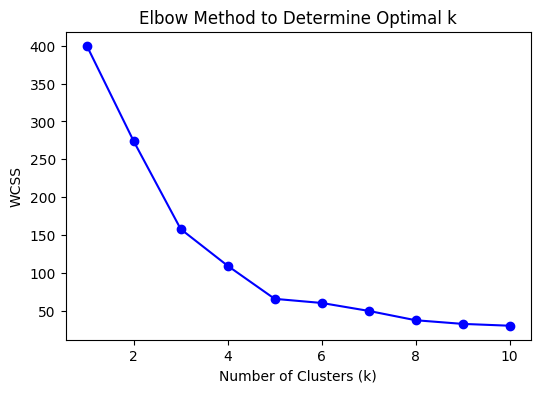

In [20]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# --- Elbow Method ---
wcss = []  # Within-Cluster Sum of Squares

# Try k values from 1 to 10
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

# Plot the Elbow Curve
plt.figure(figsize=(6, 4))
plt.plot(range(1, 11), wcss, marker='o', linestyle='-', color='blue')
plt.title('Elbow Method to Determine Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS')
plt.show()


In [21]:
k_optimal = 5
kmeans = KMeans(n_clusters=k_optimal, init='k-means++', random_state=42)
y_kmeans = kmeans.fit_predict(X_scaled)

data['Cluster'] = y_kmeans

In [28]:
print(data.head())

   CustomerID   Genre  Age  Annual Income (k$)  Spending Score (1-100)  \
0           1    Male   19                  15                      39   
1           2    Male   21                  15                      81   
2           3  Female   20                  16                       6   
3           4  Female   23                  16                      77   
4           5  Female   31                  17                      40   

   Cluster  
0        4  
1        2  
2        4  
3        2  
4        4  


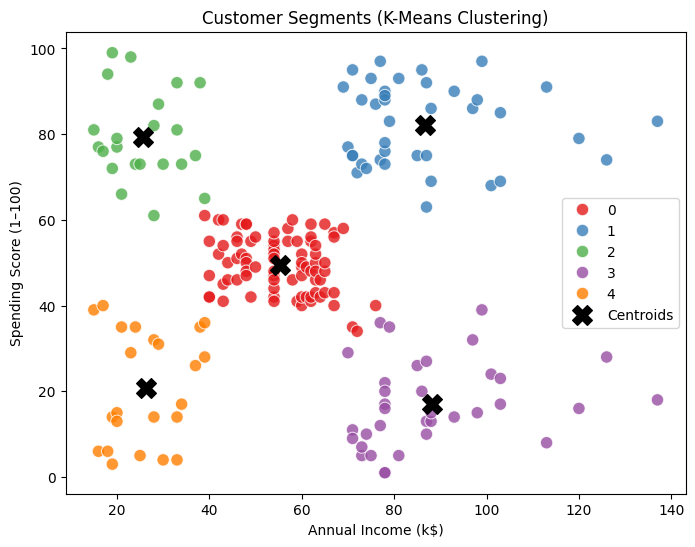

In [29]:
plt.figure(figsize=(8, 6))

sns.scatterplot(
    x=data['Annual Income (k$)'],
    y=data['Spending Score (1-100)'],
    hue=data['Cluster'],
    palette='Set1',
    s=80,
    alpha=0.8
)

centers = kmeans.cluster_centers_
plt.scatter(
    centers[:, 0] * X['Annual Income (k$)'].std() + X['Annual Income (k$)'].mean(),
    centers[:, 1] * X['Spending Score (1-100)'].std() + X['Spending Score (1-100)'].mean(),
    c='black', s=200, marker='X', label='Centroids'
)

plt.title('Customer Segments (K-Means Clustering)')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1–100)')
plt.legend()
plt.show()


* Each color represents a cluster.
* The black X marks are the cluster centroids (average position of each group).

In [30]:
cluster_summary = data.groupby('Cluster')[['Annual Income (k$)', 'Spending Score (1-100)']].mean().round(1)
cluster_summary


,Annual Income (k$),Spending Score (1-100)
Cluster,,
0,55.3,49.5
1,86.5,82.1
2,25.7,79.4
3,88.2,17.1
4,26.3,20.9


### Insights:

The K-Means clustering model was applied with k = 5 based on the Elbow Method.

Customers were grouped according to Annual Income (k$) and Spending Score (1–100).

The model identified five distinct clusters, each with unique characteristics:

* Cluster 0 – Average Income, Average Spending <br>
Balanced customers with moderate purchasing behavior.

* Cluster 1 – High Income, High Spending<br>
Premium, loyal customers and the most profitable segment.

* Cluster 2 – Low Income, High Spending<br>
Active buyers despite limited income; may respond to offers and discounts.

* Cluster 3 – High Income, Low Spending<br>
Wealthy customers with low engagement; potential to increase spending through personalized strategies.

* Cluster 4 – Low Income, Low Spending<br>
Budget-conscious customers with minimal spending activity.

These clusters provide a clear understanding of different customer behaviors and support data-driven marketing decisions.

## Business Recommendations for the Mall

Cluster 1 – High Income, High Spending (Premium Customers)  
* These are your most valuable customers — focus on retention and loyalty.
* Offer exclusive membership programs, VIP events, or priority discounts.
* Keep them engaged with personalized recommendations and early access to new arrivals.


Cluster 3 – High Income, Low Spending (Untapped Potential)

* They have strong purchasing power but low spending habits.
* Use personalized marketing campaigns to spark interest (e.g., premium product bundles, targeted ads).
* Provide luxury shopping experiences or tailored incentives to encourage higher spending.

Cluster 2 – Low Income, High Spending (Active Shoppers)

* These customers are price-sensitive but highly active in purchasing.
* Focus on discounts, promotions, and loyalty points to retain them.
* Consider offering budget-friendly collections or flash sales to sustain engagement.

Cluster 0 – Average Income, Average Spending (Steady Buyers)

* Represent a stable customer base with balanced spending.
* Maintain engagement through seasonal promotions and standard loyalty programs.
* They can be encouraged to move toward higher spending tiers with cross-sell and upsell strategies.



Cluster 4 – Low Income, Low Spending (Minimal Engagement)

* These are the least profitable customers at the moment.
* Avoid excessive marketing spending on this group.
* Instead, use broad digital marketing or awareness campaigns to gradually attract attention.

**General Strategic Insights**

* Focus marketing efforts primarily on Clusters 1 and 3, as they represent the mall’s strongest financial opportunity.
* Develop special deals and communication strategies for Cluster 2, since they are highly active shoppers.
* Maintain brand consistency and satisfaction across all groups to retain long-term customer loyalty.